In [1]:
# Import modules and subroutines:
using ConfParser
using LaTeXStrings
include("../subroutines/Subroutines.jl");

3.10.9


In [2]:
# Load data and config parameters:
fid = h5open("../datasets/tnqe_data/h6_octahedron_sto3g_tnqe_givens_pe_curves_2024-03-15.h5", "r")
fid2 = h5open("../datasets/tnqe_data/h6_octahedron_sto3g_uccsd_pe_curves_2024-03-15.h5", "r")

# Quick hard-coded script for a single result
# Points obtained with chi=4, M=5:
md_fname = "h6_sto3g_031324%1756.hdf5"

chemical_data_list = ReadIn("../datasets/pyscf_data/"*md_fname)

conf = ConfParse("../configs/pyscf_configs/h6_octahedron_sto3g.ini")
parse_conf!(conf)
bond_lengths = parse.(Float64, retrieve(conf, "GEOMETRIES", "xyz_files")) .* sqrt(2);

In [3]:
n_x_list = [5,7,9,11,13,15,17,19,21,23,25,27,29,31]

bond_subset = [read(fid[string(n_x)], "bond_length") for n_x in n_x_list] .* sqrt(2);

In [4]:
e_tnqe_vec = [read(fid[string(n_x)], "energies") .+ chemical_data_list[n_x].e_nuc for n_x in n_x_list]
e_uccsd_vec = [read(fid2[string(n_x)], "energies") for n_x in n_x_list]

14-element Vector{Vector{Float64}}:
 [-2.4617913592065417]
 [-2.597944429269665]
 [-2.6339805287295714]
 [-2.6416543403576354]
 [-2.6115878755787945]
 [-2.567185766324121]
 [-2.5775498386859663]
 [-2.550413907353618]
 [-2.5135712907060923]
 [-2.479812480562553]
 [-2.445027508220217]
 [-2.3241564223017983]
 [-2.374275069894646]
 [-2.346854776092558]

In [5]:
# Points with M=5:
pts = [e_tnqe_vec[r][4] for r=1:14]

# This data was re-run with a random initial ordering to fix the hard-to-converge points (see notebook):
pts[8] = -6.583333949035383 + chemical_data_list[n_x_list[8]].e_nuc
pts[12] = -5.739180104778242 + chemical_data_list[n_x_list[12]].e_nuc # M = 4
#pts[12] = -5.739698936736202 + chemical_data_list[n_x_list[12]].e_nuc # M = 5
pts[13] = -5.583230447635868 + chemical_data_list[n_x_list[13]].e_nuc # M = 4
#pts[13] = -5.583575829535012 + chemical_data_list[n_x_list[13]].e_nuc # M = 5

# Fixed ill-converged uccsd point at 1.8A (recomputed HF orbitals):
e_uccsd_vec[12] = [-2.413054]

1-element Vector{Float64}:
 -2.413054

In [6]:
# Collect the potential energy curves:

e_rhf_vec = [chemical_data_list[m].e_rhf for m=1:length(chemical_data_list)]
e_fci_vec = [chemical_data_list[m].e_fci for m=1:length(chemical_data_list)];

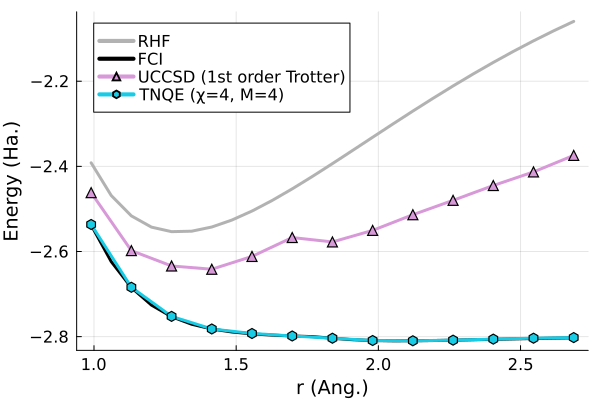

"/home/oskar/Documents/TNQE/TNQE-Julia/plots/pe_curve_h6_tnqe_uccsd.pdf"

In [8]:
fx = [5,29]

plt1 = plot(
    [],
    [],
    xlabel="r (Ang.)", 
    ylabel="Energy (Ha.)", 
    #title="Octahedral H6; STO-3G; 1.2A; m=3", 
    gridlinewidth=1.0,
    gridalpha=0.1,
    xguidefontsize=13,
    yguidefontsize=13,
    xtickfontsize=11,
    ytickfontsize=11,
    legendfontsize=11,
    primary=false
)

plot!(
    bond_lengths[fx[1]:fx[2]], 
    e_rhf_vec[fx[1]:fx[2]],
    lw=3.0,
    color=RGB(0.7,0.7,0.7),
    label="RHF"
)

plot!(
    bond_lengths[fx[1]:fx[2]], 
    e_fci_vec[fx[1]:fx[2]],
    lw=3.0,
    color=RGB(0,0,0),
    label="FCI"
)

plot!(
    bond_subset[1:13], 
    [e_uccsd_vec[r][1] for r=1:13], 
    markershape=:utriangle, 
    markersize=5, 
    markerstrokewidth=1.5,
    lw=3.0, 
    color=RGB(0.85,0.6,0.85),
    label="UCCSD (1st order Trotter)"
)

"""
plot!(
    bond_subset[pts], 
    [e_tnqe_vec[r][2] for r in pts], 
    markershape=:utriangle, 
    markersize=5, 
    markerstrokewidth=1.5,
    lw=3.0, 
    color=RGB(1.0,0.7,0.2),
    label="M=2"
)
"""

plot!(
    bond_subset[1:13], 
    pts[1:13], 
    markershape=:hexagon, 
    markersize=5.0, 
    #markerstrokecolor=RGB(0.2,0.2,0.2),
    markerstrokewidth=1.5,
    lw=3.0, 
    color=RGB(0.1,0.8,0.9),
    label="TNQE (χ=4, M=4)"
)

display(plt1)
savefig(plt1, "../plots/pe_curve_h6_tnqe_uccsd.pdf")

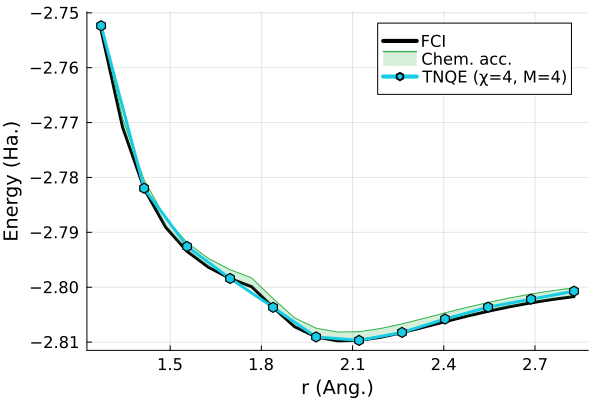

"/home/oskar/Documents/TNQE/TNQE-Julia/plots/pe_curve_h6_tnqe.pdf"

In [39]:
fx = [9,31]
tx = [3,14]


plt1 = plot(
    [],
    [],
    xlabel="r (Ang.)", 
    ylabel="Energy (Ha.)", 
    #title="Octahedral H6; STO-3G; 1.2A; m=3", 
    gridlinewidth=1.0,
    gridalpha=0.1,
    xguidefontsize=13,
    yguidefontsize=13,
    xtickfontsize=11,
    ytickfontsize=11,
    legendfontsize=11,
    primary=false
)

"""
plot!(
    bond_lengths[fx[1]:fx[2]], 
    e_rhf_vec[fx[1]:fx[2]],
    lw=3.0,
    color=RGB(0.7,0.7,0.7),
    label="RHF"
)
"""

plot!(
    bond_lengths[fx[1]:fx[2]], 
    e_fci_vec[fx[1]:fx[2]],
    lw=3.0,
    color=RGB(0,0,0),
    label="FCI"
)

plot!(
    bond_lengths[fx[1]:fx[2]], 
    e_fci_vec[fx[1]:fx[2]].+0.0016,
    fill=e_fci_vec[fx[1]:fx[2]],
    fillalpha=0.2, 
    lw=1.0,
    color=RGB(0.2,0.7,0.3),
    label="Chem. acc."
)

"""
plot!(
    bond_subset[tx[1]:tx[2]], 
    [e_tnqe_vec[r][1] for r=tx[1]:tx[2]], 
    markershape=:diamond, 
    markersize=5, 
    markerstrokewidth=1.5,
    lw=3.0, 
    color=RGB(0.2,0.5,0.9),
    label="M=1"
)
"""

plot!(
    bond_subset[tx[1]:tx[2]], 
    pts[tx[1]:tx[2]],
    markershape=:hexagon, 
    markersize=5.0, 
    #markerstrokecolor=RGB(0.2,0.2,0.2),
    markerstrokewidth=1.5,
    lw=3.0, 
    color=RGB(0.1,0.8,0.9),
    label="TNQE (χ=4, M=4)"
)

display(plt1)
savefig(plt1, "../plots/pe_curve_h6_tnqe.pdf")

In [3]:
# Load data and config parameters:
fid3 = h5open("../datasets/tnqe_data/h2o_stretch_sto3g_tnqe_givens_pe_curves_2024-03-20.h5", "r")

# Quick hard-coded script for a single result
# Points obtained with chi=4, M=5:
md_fname2 = "h2o_sto3g_032024%0918.hdf5"

chemical_data_list2 = ReadIn("../datasets/pyscf_data/"*md_fname2)

conf2 = ConfParse("../configs/pyscf_configs/h2o_stretch_sto3g.ini")
parse_conf!(conf2)
bond_lengths2 = parse.(Float64, retrieve(conf2, "GEOMETRIES", "xyz_files"));

n_x_list2 = [2,4,6,8,10,12,14,16,18,20,22,24,26]

bond_subset2 = [bond_lengths2[n_x] for n_x in n_x_list2];

In [4]:
# Collect the potential energy curves:

e_rhf_vec2 = [chemical_data_list2[m].e_rhf for m=1:length(chemical_data_list2)]
e_fci_vec2 = [chemical_data_list2[m].e_fci for m=1:length(chemical_data_list2)];

In [5]:
e_tnqe_vec2 = [read(fid3[string(n_x)], "energies") .+ chemical_data_list2[n_x].e_nuc for n_x in n_x_list2];

In [8]:
pts2 = [e_tnqe_vec2[r][3] for r=1:13];

# Fixed hard-to-converge points (just ran the notebook again with different randomized starting parameters)
pts2[10] = -78.40928 + chemical_data_list2[20].e_nuc # M = 3
#pts2[10] = -78.40963 + chemical_data_list2[20].e_nuc # M = 4
pts2[9] = -78.74857 + chemical_data_list2[18].e_nuc # M = 3
pts2[8] = -79.16259 + chemical_data_list2[16].e_nuc # M = 3
pts2[12] = -77.88137 + chemical_data_list2[24].e_nuc # M = 3

# Ran some more calculations with the notebook and added datapoints by hand to make the plot look nicer:
pts3 = []
bond_subset3 = []
push!(pts3, -78.9445 + chemical_data_list2[17].e_nuc)
push!(pts3, -78.57089 + chemical_data_list2[19].e_nuc)
push!(pts3, -78.26102 + chemical_data_list2[21].e_nuc)
push!(pts3, -77.99845 + chemical_data_list2[23].e_nuc)
push!(pts3, -77.77268 + chemical_data_list2[25].e_nuc)
push!(pts3, 0.0)

pts4 = [pts2[8:13] pts3]'[1:end-1]
bond_subset3 = bond_lengths2[16:26]

11-element Vector{Float64}:
 2.0
 2.1
 2.2
 2.3
 2.4
 2.5
 2.6
 2.7
 2.8
 2.9
 3.0

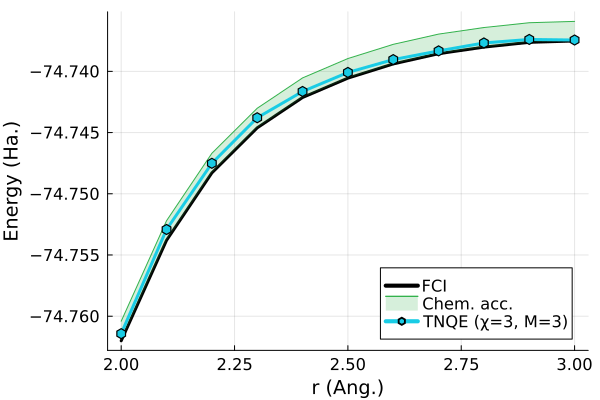

"/home/oskar/Documents/TNQE/TNQE-Julia/plots/pe_curve_h2o_tnqe.pdf"

In [9]:
tx = [8,13]
fx = tx .* 2


plt1 = plot(
    [],
    [],
    xlabel="r (Ang.)", 
    ylabel="Energy (Ha.)", 
    #title="Octahedral H6; STO-3G; 1.2A; m=3", 
    gridlinewidth=1.0,
    gridalpha=0.1,
    xguidefontsize=13,
    yguidefontsize=13,
    xtickfontsize=11,
    ytickfontsize=11,
    legendfontsize=11,
    legend=:bottomright,
    primary=false
)

"""
plot!(
    bond_lengths[fx[1]:fx[2]], 
    e_rhf_vec[fx[1]:fx[2]],
    lw=3.0,
    color=RGB(0.7,0.7,0.7),
    label="RHF"
)
"""

plot!(
    bond_lengths2[fx[1]:fx[2]], 
    e_fci_vec2[fx[1]:fx[2]],
    lw=3.0,
    color=RGB(0,0,0),
    label="FCI"
)

plot!(
    bond_lengths2[fx[1]:fx[2]], 
    e_fci_vec2[fx[1]:fx[2]].+0.0016,
    fill=e_fci_vec2[fx[1]:fx[2]],
    fillalpha=0.2, 
    lw=1.0,
    color=RGB(0.2,0.7,0.3),
    label="Chem. acc."
)

"""
plot!(
    bond_subset[tx[1]:tx[2]], 
    [e_tnqe_vec[r][1] for r=tx[1]:tx[2]], 
    markershape=:diamond, 
    markersize=5, 
    markerstrokewidth=1.5,
    lw=3.0, 
    color=RGB(0.2,0.5,0.9),
    label="M=1"
)
"""

plot!(
    bond_subset3,
    #bond_subset2[tx[1]:tx[2]], 
    pts4,
    #pts2[tx[1]:tx[2]],
    markershape=:hexagon, 
    markersize=5.0, 
    #markerstrokecolor=RGB(0.2,0.2,0.2),
    markerstrokewidth=1.5,
    lw=3.0, 
    color=RGB(0.1,0.8,0.9),
    label="TNQE (χ=3, M=3)"
)


display(plt1)
savefig(plt1, "../plots/pe_curve_h2o_tnqe.pdf")